**Итоговый проект по курсу "Python для анализа данных"**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import scipy.stats as st

**Задание**
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Признаки:
1. **satisfaction_level** - Уровень удовлетворенности работой
2. **Last_evaluation** - Время с момента последней оценки в годах
3. **number_projects** - Количество проектов, выполненных за время работы
4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц
5. **time_spend_company** - Стаж работы в компании в годах
6. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. **left** - уволился ли сотрудник
8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет
9. **department** - отдел в котором работает сотрудник
10. **salary** - относительный уровень зарплаты


Задание 1. Загрузите файл HR.csv в pandas dataframe

In [2]:
hr_df = pd.read_csv('HR.csv')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Задание 2. Рассчитайте основные статистики для переменных
*(среднее, медиана, мода, мин/макс, сред.отклонение)*

In [4]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
hr_quantitative_data_df = hr_df[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company']]

In [6]:
for col in hr_quantitative_data_df:
  mean_ = hr_df[col].mean()
  median_ = hr_df[col].median()
  mode_ = hr_df[col].mode()[0]
  min_ = hr_df[col].min()
  max_ = hr_df[col].max()
  stdev_ = np.sqrt(hr_df[col].var())
  print(col, f'mean: {mean_}', f'median: {median_}', f'mode: {mode_}', f'min: {min_}', f'max: {max_}', f'stdev: {stdev_}', '', sep='\n')

satisfaction_level
mean: 0.6128335222348156
median: 0.64
mode: 0.1
min: 0.09
max: 1.0
stdev: 0.24863065106114257

last_evaluation
mean: 0.7161017401160078
median: 0.72
mode: 0.55
min: 0.36
max: 1.0
stdev: 0.17116911062327533

number_project
mean: 3.80305353690246
median: 4.0
mode: 4
min: 2
max: 7
stdev: 1.2325923553183522

average_montly_hours
mean: 201.0503366891126
median: 200.0
mode: 135
min: 96
max: 310
stdev: 49.94309937128408

time_spend_company
mean: 3.498233215547703
median: 3.0
mode: 3
min: 2
max: 10
stdev: 1.4601362305354812



Задание 3. Рассчитайте и визуализируйте корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные

In [7]:
hr_quantitative_data_df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<Axes: >

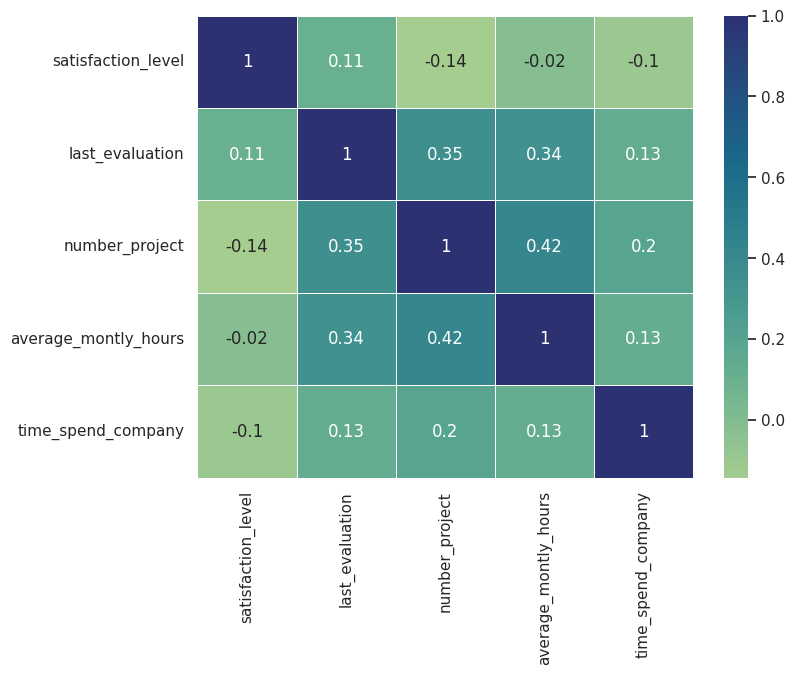

In [8]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(hr_quantitative_data_df.corr(), annot=True, cmap='crest', linewidths=.5)

*Две самые скоррелированные переменные: number_project и average_montly_hours*

*Две наименее скоррелированные переменные: satisfaction_level и average_montly_hours*

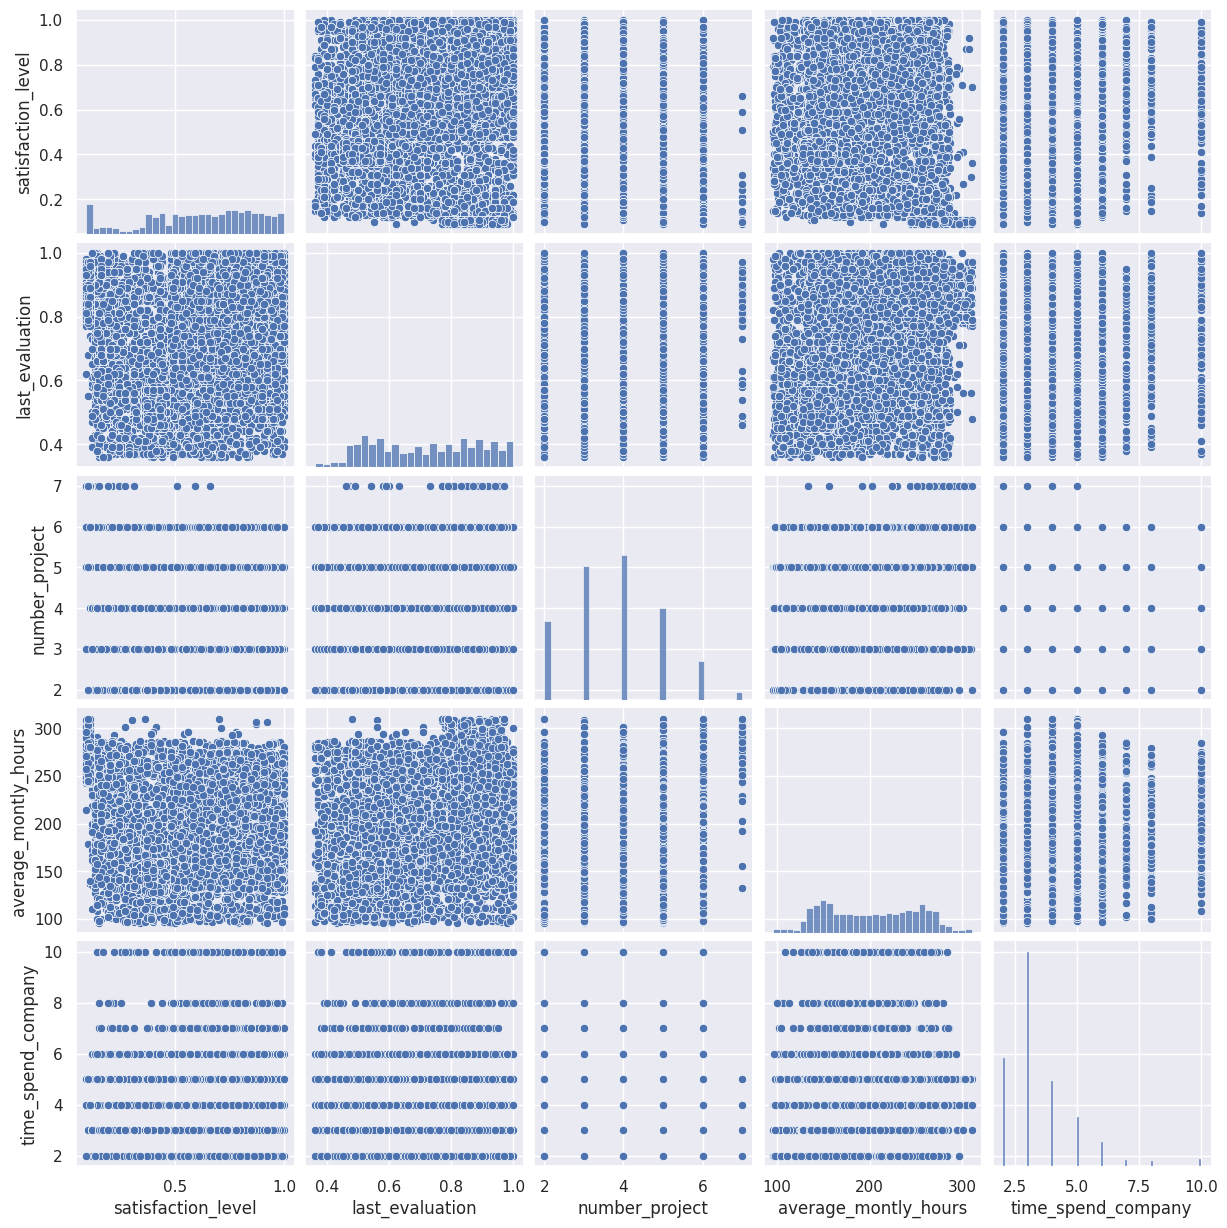

In [9]:
sns.pairplot(hr_quantitative_data_df)

Задача 4. Рассчитайте сколько сотрудников работает в каждом
департаменте

In [10]:
hr_df.groupby('department').count().sort_values(by='salary', ascending=False)[['salary']].rename(columns={"salary": "worker count in department"})

,worker count in department
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


Задание 5. Показать распределение сотрудников по зарплатам

In [11]:
hr_df.groupby('salary').count().sort_values(by='department', ascending=False)[['department']].rename(columns={"department": "worker count by salary"})

,worker count by salary
salary,
low,7316
medium,6446
high,1237


<Axes: title={'center': 'Распределение сотрудников по зарплатам'}, xlabel='Уровень зарплаты', ylabel='Количество сотрудников'>

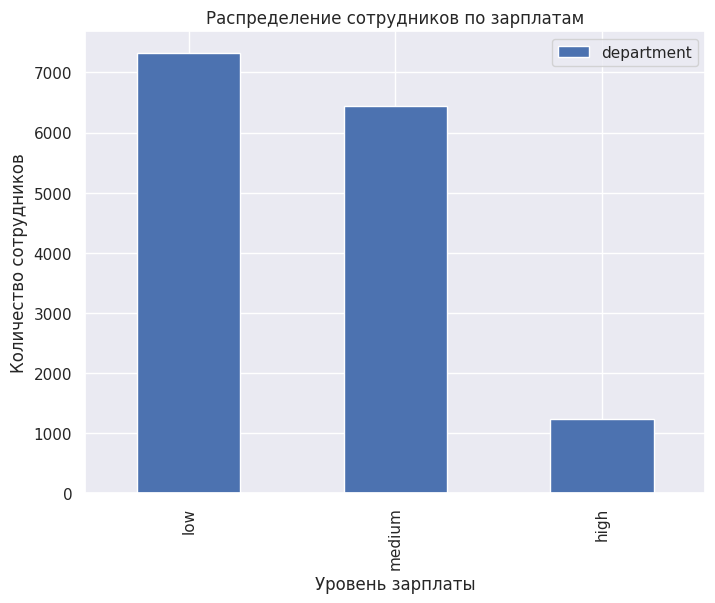

In [12]:
hr_df.groupby('salary').count().sort_values(by='department', ascending=False)[['department']].plot(kind='bar', title='Распределение сотрудников по зарплатам', xlabel='Уровень зарплаты', ylabel='Количество сотрудников')


Задание 6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

In [13]:
hr_df.pivot_table(index='department', columns='salary', values='left', aggfunc='count')

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


<Axes: xlabel='salary', ylabel='department'>

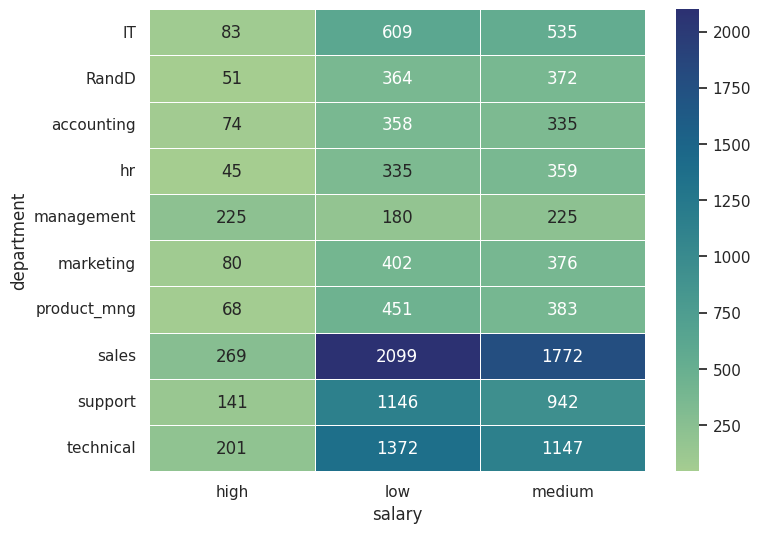

In [14]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(hr_df.pivot_table(index='department', columns='salary', values='left', aggfunc='count'), annot=True, cmap='crest', fmt="d", linewidths=.5)

Задание 7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [15]:
hr_df.groupby('salary').mean()[['average_montly_hours']]

<ipython-input-15-8ba8c86cc8f1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hr_df.groupby('salary').mean()[['average_montly_hours']]


,average_montly_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


<Axes: title={'center': 'Среднее количество часов на рабочем месте в месяц'}, ylabel='Frequency'>

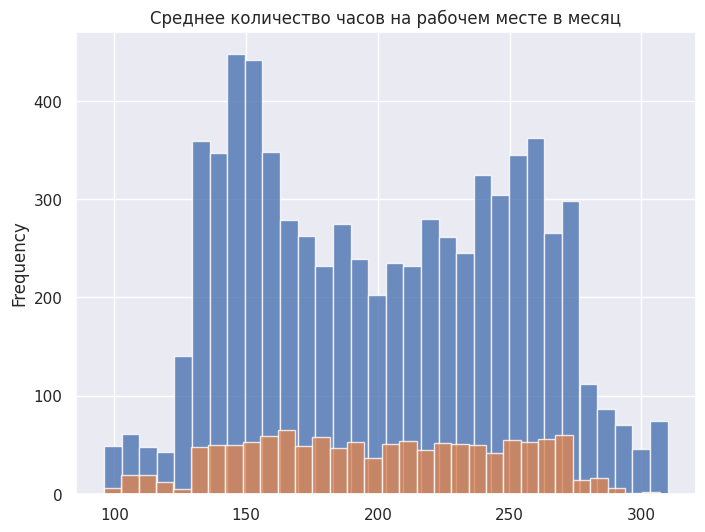

In [16]:
hr_df[hr_df['salary'] == 'low']['average_montly_hours'].plot(kind='hist', title='Среднее количество часов на рабочем месте в месяц', alpha = 0.8, bins=32)
hr_df[hr_df['salary'] == 'high']['average_montly_hours'].plot(kind='hist', title='Среднее количество часов на рабочем месте в месяц', alpha = 0.8, bins=32)

In [17]:
hr_low_mean = hr_df[hr_df['salary'] == 'low']['average_montly_hours']
hr_high_mean = hr_df[hr_df['salary'] == 'high']['average_montly_hours']
stat, p = st.ttest_ind(hr_high_mean, hr_low_mean)

print(f'Statistic: {stat:.3f}, p = {p:.5f}')

if p > 0.05:
  print('Mean are probably the same')
else:
  print('Mean are probably different')

Statistic: -0.729, p = 0.46610
Mean are probably the same


*Гипотеза проверку не прошла, все в среднем проводят одинаковое количество времени*

Задание 8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [18]:
hr_left_df = hr_df[hr_df['left'] == 1]
print('Lefted workers')
print(f'Have promotion: {hr_left_df["promotion_last_5years"].value_counts().loc[1] / len(hr_left_df) * 100} %')
print(f'Satisfaction mean: {hr_left_df["satisfaction_level"].mean()}')
print(f'Number of projects mean: {hr_left_df["number_project"].mean()}')

Lefted workers
Have promotion: 0.5320638476617194 %
Satisfaction mean: 0.4400980117614114
Number of projects mean: 3.8555026603192384


In [19]:
hr_not_left_df = hr_df[hr_df['left'] == 0]
print('Not lefted workers')
print(f'Have promotion: {hr_not_left_df["promotion_last_5years"].value_counts().loc[1] / len(hr_not_left_df) * 100} %')
print(f'Satisfaction mean: {hr_not_left_df["satisfaction_level"].mean()}')
print(f'Number of projects mean: {hr_not_left_df["number_project"].mean()}')

Not lefted workers
Have promotion: 2.6251312565628284 %
Satisfaction mean: 0.666809590479524
Number of projects mean: 3.786664333216661


*Уволившиеся реже получали повышение, уровень удовлетворенности ниже, а вот количество проектов практически одинаково*

In [20]:
print(f'Have promotion (all workers): {hr_df["promotion_last_5years"].value_counts().loc[1] / len(hr_df) * 100} %')

Have promotion (all workers): 2.1268084538969263 %


Задание 9. Разделить данные на тестовую и обучающую выборки

Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)

Оценить качество модели на тестовой выборки

<ipython-input-21-b3cac0aefff3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hr_df.corr().loc[['left'],:], annot=True, cmap='crest', linewidths=.5)


<Axes: >

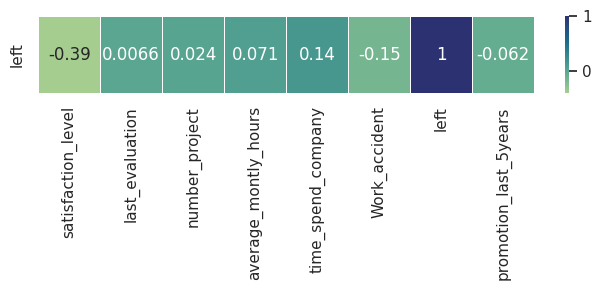

In [21]:
sns.set(rc={'figure.figsize':(8, 1)})
sns.heatmap(hr_df.corr().loc[['left'],:], annot=True, cmap='crest', linewidths=.5)

In [22]:
x = hr_df[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',		'promotion_last_5years']]
y = hr_df['left']
x_train, x_test, y_train, y_test = train_test_split(x, y)
lm = LinearRegression()
lm.fit(x_train, y_train)
print(f'lm.coef_: {lm.coef_}')
print(f'lm.intercept_: {lm.intercept_}')

lm.coef_: [-6.53164704e-01  9.47775656e-02 -3.44706629e-02  6.25331483e-04
  3.59860509e-02 -1.61723152e-01 -1.77362458e-01]
lm.intercept_: 0.47701055316110363


In [23]:
y_pred = lm.predict(x_test)
y_pred

array([0.31792298, 0.32771429, 0.26843542, ..., 0.23260571, 0.15873969,
       0.13812272])

In [24]:
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

R2: 0.1955033260681882
MAE: 0.30099850060115696
MSE: 0.1438010416010792
RMSE: 0.3792110778986806


*Показатель R2 низкий, линейня регрессия для предсказания увольнения сотрудника на этих данных не эффективна*

Задание 10. Загрузить jupyter notebook с решением на github и прислать ссылку